# SALARY PREDICTION - DATA SCIENCE PROJECT

# Importing Important Libraries

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Understanding The Data

In [294]:
# Reading the csv file and passing it to dataframe
df = pd.read_csv("glassdoor_jobs.csv.zip")

In [7]:
# Viewing the train dataset
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


# Exploratory Data Analysis (EDA)

In [9]:
# checking general information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [11]:
print("Total enteries : ",df.shape[0])
print("Total attributes : ",df.shape[1])

Total enteries :  956
Total attributes :  15


In [13]:
df.shape

(956, 15)

In [15]:
# checking the total number of missing or null values for each column
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [17]:
# checking for number of duplicate rows
df.duplicated().sum()

0

In [19]:
len(df[df.duplicated()])

0

In [21]:
# Dropping the Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [23]:
# Checking a summary of numerical attributes/Statistical overview
df.describe()

,Rating,Founded
count,956.000000,956.000000
mean,3.601255,1774.605649
std,1.067619,598.942517
min,-1.000000,-1.000000
25%,3.300000,1937.000000
50%,3.800000,1992.000000
75%,4.200000,2008.000000
max,5.000000,2019.000000


In [25]:
# Checking description (count, unique values, top category, frequency) for categorical and object-type columns
df.describe(include = ['object', 'category'])

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
count,956,956,956,956,956,956,956,956,956,956,956,956
unique,328,417,596,448,237,235,9,13,63,25,14,149
top,Data Scientist,-1,Day Shift: 7A-330P. Holidays and every other w...,Novartis\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,178,214,4,14,78,75,177,532,148,239,299,634


# DATA CLEANING

In [27]:
df.drop(["Job Description", "Headquarters", "Founded", "Competitors"], axis=1, inplace=True)


In [29]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [31]:
len(df[df.duplicated()])

356

In [33]:
df.drop_duplicates(inplace = True)

In [35]:
df.shape

(600, 10)

In [37]:
df.head(20)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
5,Data Scientist,$71K-$119K (Glassdoor est.),3.4,CyrusOne\n3.4,"Dallas, TX",201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD)
6,Data Scientist,$54K-$93K (Glassdoor est.),4.1,ClearOne Advantage\n4.1,"Baltimore, MD",501 to 1000 employees,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable
7,Data Scientist,$86K-$142K (Glassdoor est.),3.8,Logic20/20\n3.8,"San Jose, CA",201 to 500 employees,Company - Private,Consulting,Business Services,$25 to $50 million (USD)
8,Research Scientist,$38K-$84K (Glassdoor est.),3.3,Rochester Regional Health\n3.3,"Rochester, NY",10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD)
9,Data Scientist,$120K-$160K (Glassdoor est.),4.6,<intent>\n4.6,"New York, NY",51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD)


In [44]:
# Filtering out rows from the DataFrame where any categorical column (string or object type) contains the value "-1"
df = df.loc[~df.apply(lambda row: any(row[col] == '-1' for col in df.select_dtypes(include=['object']).columns), axis=1)]


In [46]:
df.shape

(460, 10)

# Cleaning The Salary Estimate Column

In [48]:
# Removing the glassdoor est in parentheses from the Salary Estimate column
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [50]:
# Viewing the first five rows to check the Salary Estimate column
df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,$53K-$91K,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [54]:
# Removing the K and $ from the Salary Estimate
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))

In [56]:
# Viewing the first five rows to check the Salary Estimate column
df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,53-91,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,80-90,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,56-97,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,86-143,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [64]:
df.head(50)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,53-91,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,80-90,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,56-97,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,86-143,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
5,Data Scientist,71-119,3.4,CyrusOne\n3.4,"Dallas, TX",201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD)
6,Data Scientist,54-93,4.1,ClearOne Advantage\n4.1,"Baltimore, MD",501 to 1000 employees,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable
7,Data Scientist,86-142,3.8,Logic20/20\n3.8,"San Jose, CA",201 to 500 employees,Company - Private,Consulting,Business Services,$25 to $50 million (USD)
8,Research Scientist,38-84,3.3,Rochester Regional Health\n3.3,"Rochester, NY",10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD)
9,Data Scientist,120-160,4.6,<intent>\n4.6,"New York, NY",51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD)


In [66]:
df.tail(50)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue
727,Senior Data Engineer,67-127,4.0,Novetta\n4.0,"Reston, VA",501 to 1000 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD)
730,Data Modeler (Analytical Systems),66-117,3.6,MassMutual\n3.6,"Boston, MA",5001 to 10000 employees,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD)
732,Data Scientist in Translational Medicine,86-143,3.8,Novartis\n3.8,"Cambridge, MA",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD)
734,Product Manager/Data Evangelist,50-98,3.2,"Numeric, LLC\n3.2","Phila, PA",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD)
737,"Senior Data Scientist – Visualization, Novarti...",92-150,3.8,Novartis\n3.8,"Cambridge, MA",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD)
738,Senior Data Analyst/Scientist,90-153,4.5,Demandbase\n4.5,"San Francisco, CA",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD)
744,Data Engineer,42-79,3.4,IntraEdge\n3.4,"Scottsdale, AZ",501 to 1000 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD)
747,Big Data Engineer,84-153,3.3,Peraton\n3.3,"Chantilly, VA",1001 to 5000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD)
752,Data Engineering Analyst,44-73,3.8,COUNTRY Financial\n3.8,"Bloomington, IL",1001 to 5000 employees,Company - Private,Insurance Carriers,Insurance,$2 to $5 billion (USD)
755,Manager of Data Science,40-87,3.9,Tapjoy\n3.9,"San Francisco, CA",201 to 500 employees,Company - Private,Internet,Information Technology,$10 to $25 million (USD)


In [68]:
# Removing Per hour & Employer provided salary text in Salary Estimated Column
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employer'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [70]:
# Removing unwanted text like "per hour" and "employer provided salary:" in the Salary Estimate column
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))

In [74]:
df.head(50)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer
0,Data Scientist,53-91,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0
2,Data Scientist,80-90,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0
3,Data Scientist,56-97,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0
4,Data Scientist,86-143,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0
5,Data Scientist,71-119,3.4,CyrusOne\n3.4,"Dallas, TX",201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),0,0
6,Data Scientist,54-93,4.1,ClearOne Advantage\n4.1,"Baltimore, MD",501 to 1000 employees,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,0,0
7,Data Scientist,86-142,3.8,Logic20/20\n3.8,"San Jose, CA",201 to 500 employees,Company - Private,Consulting,Business Services,$25 to $50 million (USD),0,0
8,Research Scientist,38-84,3.3,Rochester Regional Health\n3.3,"Rochester, NY",10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),0,0
9,Data Scientist,120-160,4.6,<intent>\n4.6,"New York, NY",51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD),0,0


# The Salary Estimate column is in a range and it has to be converted to a single integer.


In [77]:
# Creating two additional columns by splitting the Salary estimate column into Minimum and Maximum salary.
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

In [79]:
df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer,Min_Salary,Max_Salary
0,Data Scientist,53-91,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,91
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,112
2,Data Scientist,80-90,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,90
3,Data Scientist,56-97,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,56,97
4,Data Scientist,86-143,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,86,143


In [81]:
# Calculating the avarage salary estimate of the minimum and maximum columns
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])/2

df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer,Min_Salary,Max_Salary
0,Data Scientist,72.0,3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,91
1,Healthcare Data Scientist,87.5,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,112
2,Data Scientist,85.0,4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,90
3,Data Scientist,76.5,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,56,97
4,Data Scientist,114.5,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,86,143


In [100]:
# Dropping the minimum salary and maximum salary columns.
df.drop(['Min_Salary','Max_Salary'] , axis =1, inplace=True)

# Cleaning The "Company Name" Column

In [88]:
# Modifying the 'Company Name' column based on the 'Rating' column:
# If the company's 'Rating' is less than 0, the 'Company Name' stays the same. Otherwise, it removes the last character from the 'Company Name'
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-1], axis = 1)


In [92]:
# Cleaning the 'Company Name' column by removing any extra text after a newline (\n).
df['Company Name']= df['Company Name'].apply(lambda x: x.split('\n')[0])

In [102]:
df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer
0,Data Scientist,72.0,3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0
1,Healthcare Data Scientist,87.5,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0
2,Data Scientist,85.0,4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0
3,Data Scientist,76.5,3.8,PNNL,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0
4,Data Scientist,114.5,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0


In [104]:
# Extracting the state from the 'Location' column and stores it in a new column called 'State.'
df['State'] = df.Location.apply(lambda x: x.split(',')[1])

# Viewing the first five rows
df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer,State
0,Data Scientist,72.0,3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,NM
1,Healthcare Data Scientist,87.5,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,MD
2,Data Scientist,85.0,4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,FL
3,Data Scientist,76.5,3.8,PNNL,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,WA
4,Data Scientist,114.5,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,NY


<Axes: >

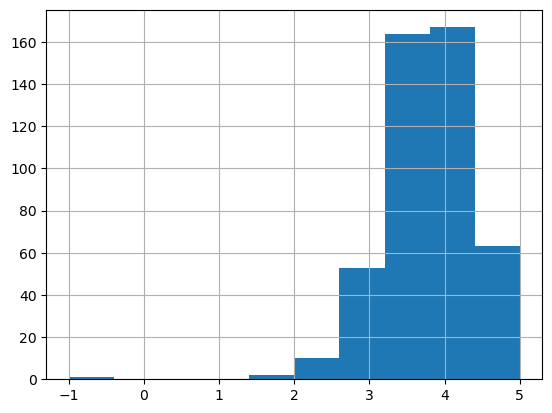

In [108]:
# Understanding the distribution of company ratings.
df.Rating.hist()

<Axes: >

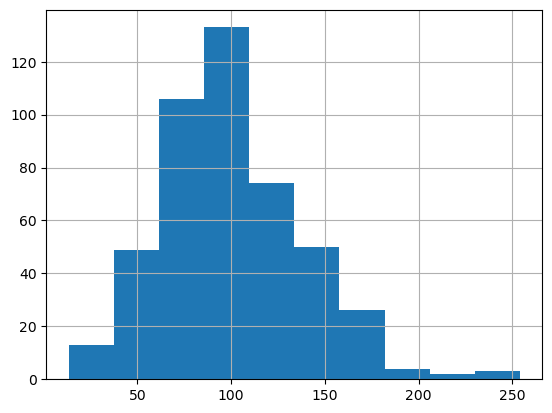

In [110]:
# Understanding the distribution of Salary Estimate.
df['Salary Estimate'].hist()

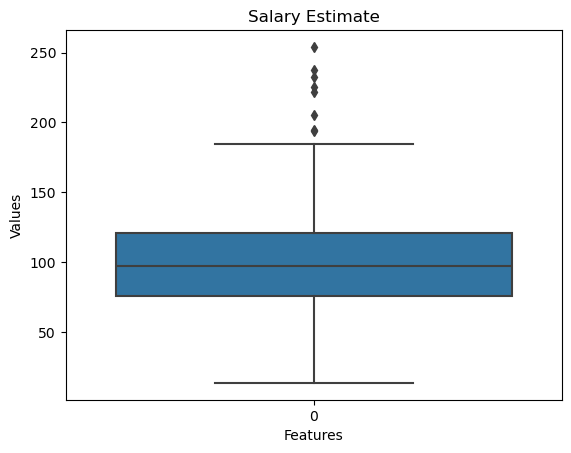

In [124]:
# Identifying outliers in the Salary Estimate
sns.boxplot(df["Salary Estimate"])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Salary Estimate')

# Show the plot
plt.show()

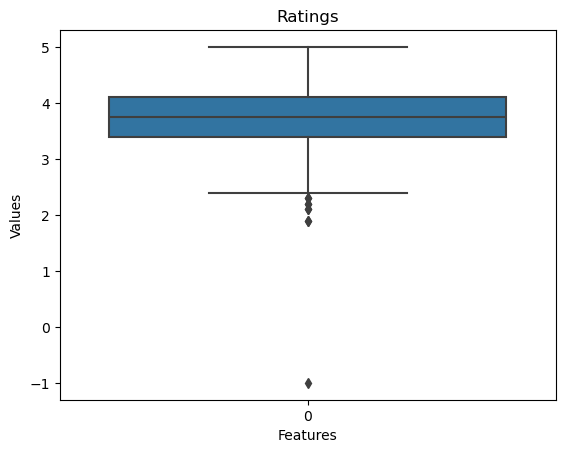

In [126]:
# Identifying outliers in the Rating
sns.boxplot(df["Rating"])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Ratings')

# Show the plot
plt.show()

In [136]:
# Correlation between Rating and Salary Estimate
Correlation_df = df[['Rating','Salary Estimate']].corr()
Correlation_df

,Rating,Salary Estimate
Rating,1.000000,0.049774
Salary Estimate,0.049774,1.000000


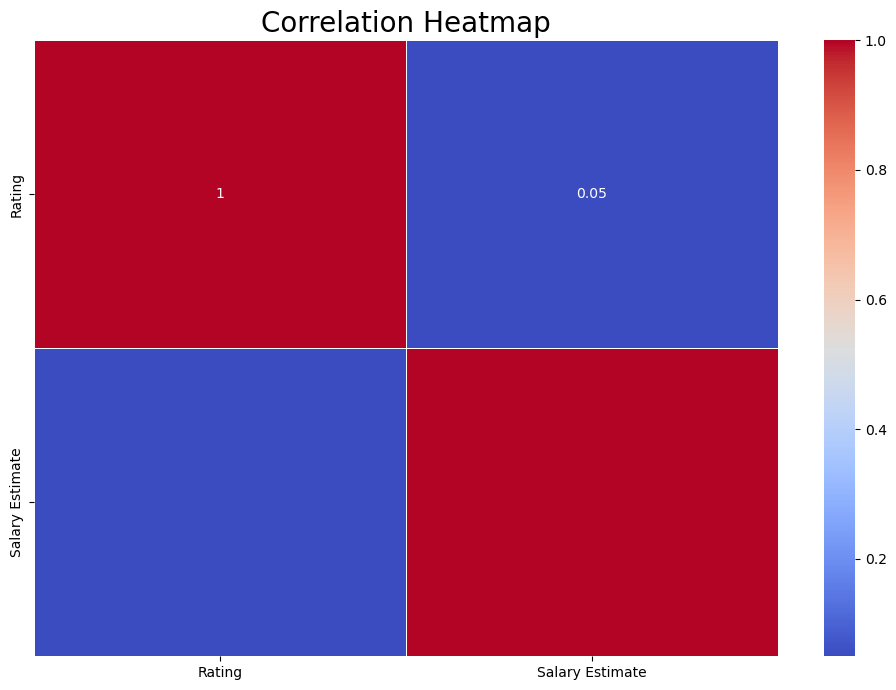

In [140]:
# Visualising the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap (Correlation_df, annot= True, cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

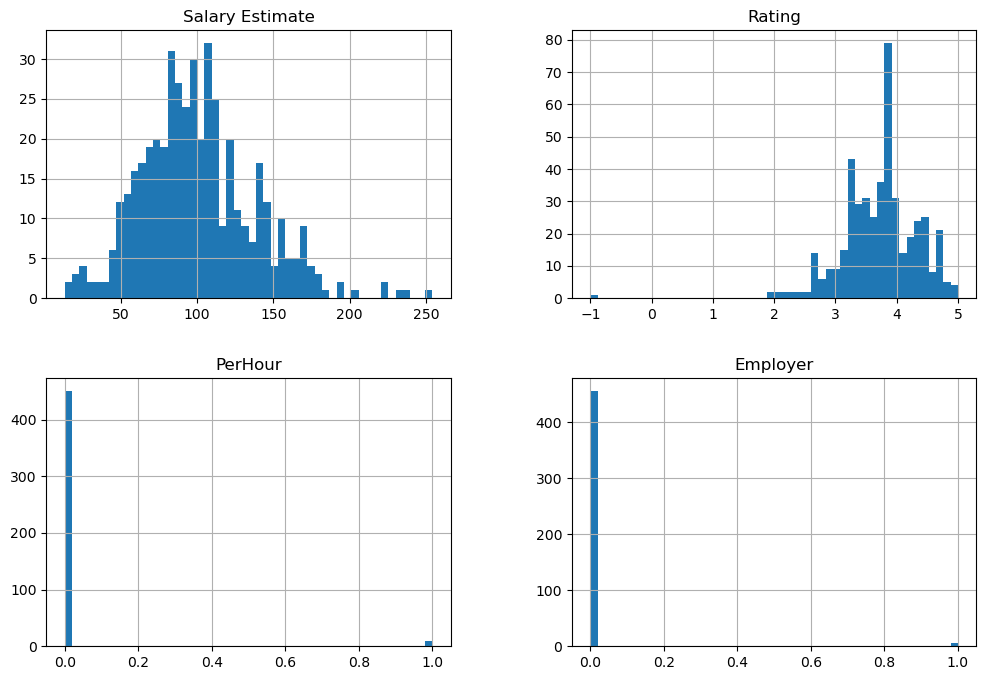

In [142]:
# Histogram for each numerical attribute to get a feel of the type of data you are dealing with

df.hist(bins=50, figsize=(12, 8))
plt.show()

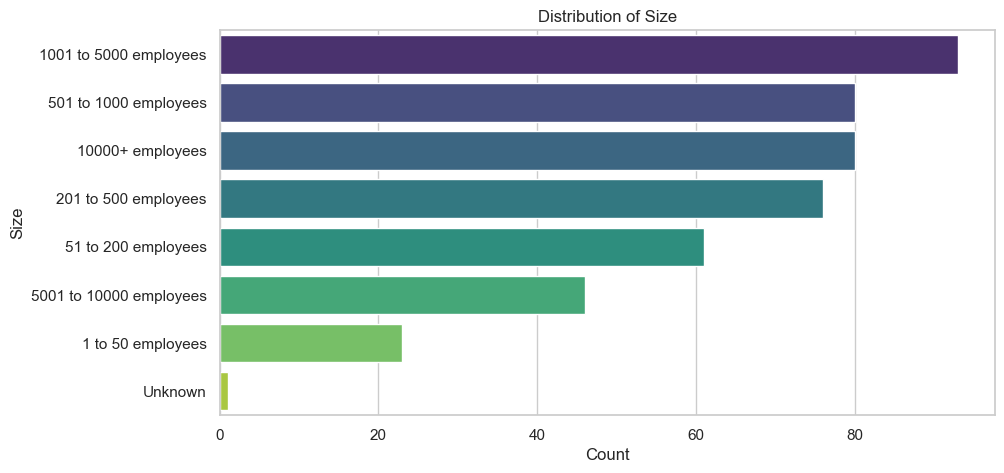

In [144]:

sns.set(style="whitegrid")  # Set a clean background
plt.figure(figsize=(10, 5))  # Set figure size

sns.countplot(y=df['Size'], order=df['Size'].value_counts().index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("Size")
plt.title("Distribution of Size")
plt.show()


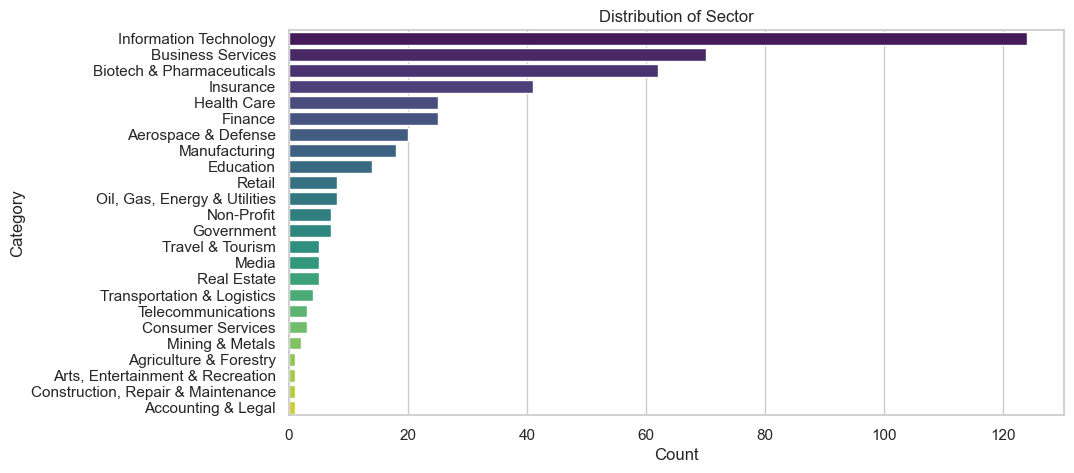

In [146]:

sns.set(style="whitegrid")  # Set a clean background
plt.figure(figsize=(10, 5))  # Set figure size

sns.countplot(y=df['Sector'], order=df['Sector'].value_counts().index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of Sector")
plt.show()


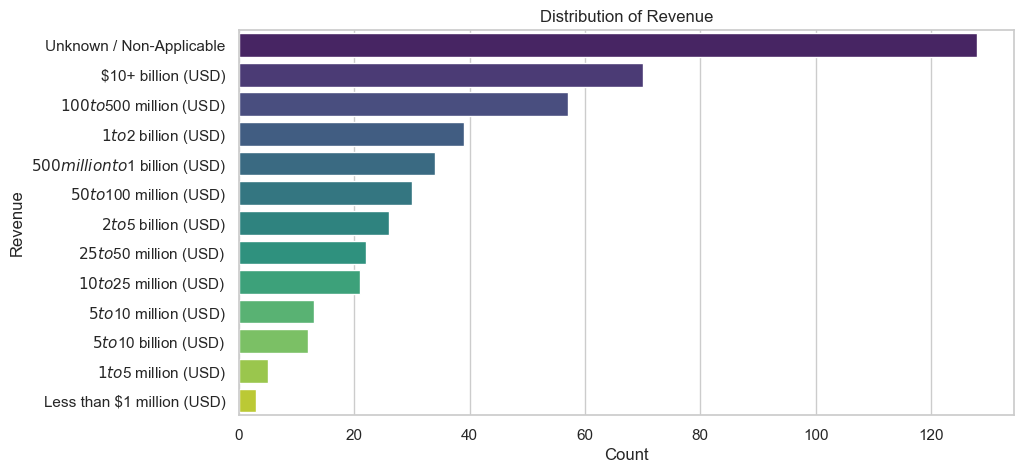

In [148]:

sns.set(style="whitegrid")  # Set a clean background
plt.figure(figsize=(10, 5))  # Set figure size

sns.countplot(y=df['Revenue'], order=df['Revenue'].value_counts().index, palette="viridis")

plt.xlabel("Count")
plt.ylabel("Revenue")
plt.title("Distribution of Revenue")
plt.show()

Graph for Location: Total = 20
Graph for Company Name: Total = 20
Graph for Industry: Total = 20


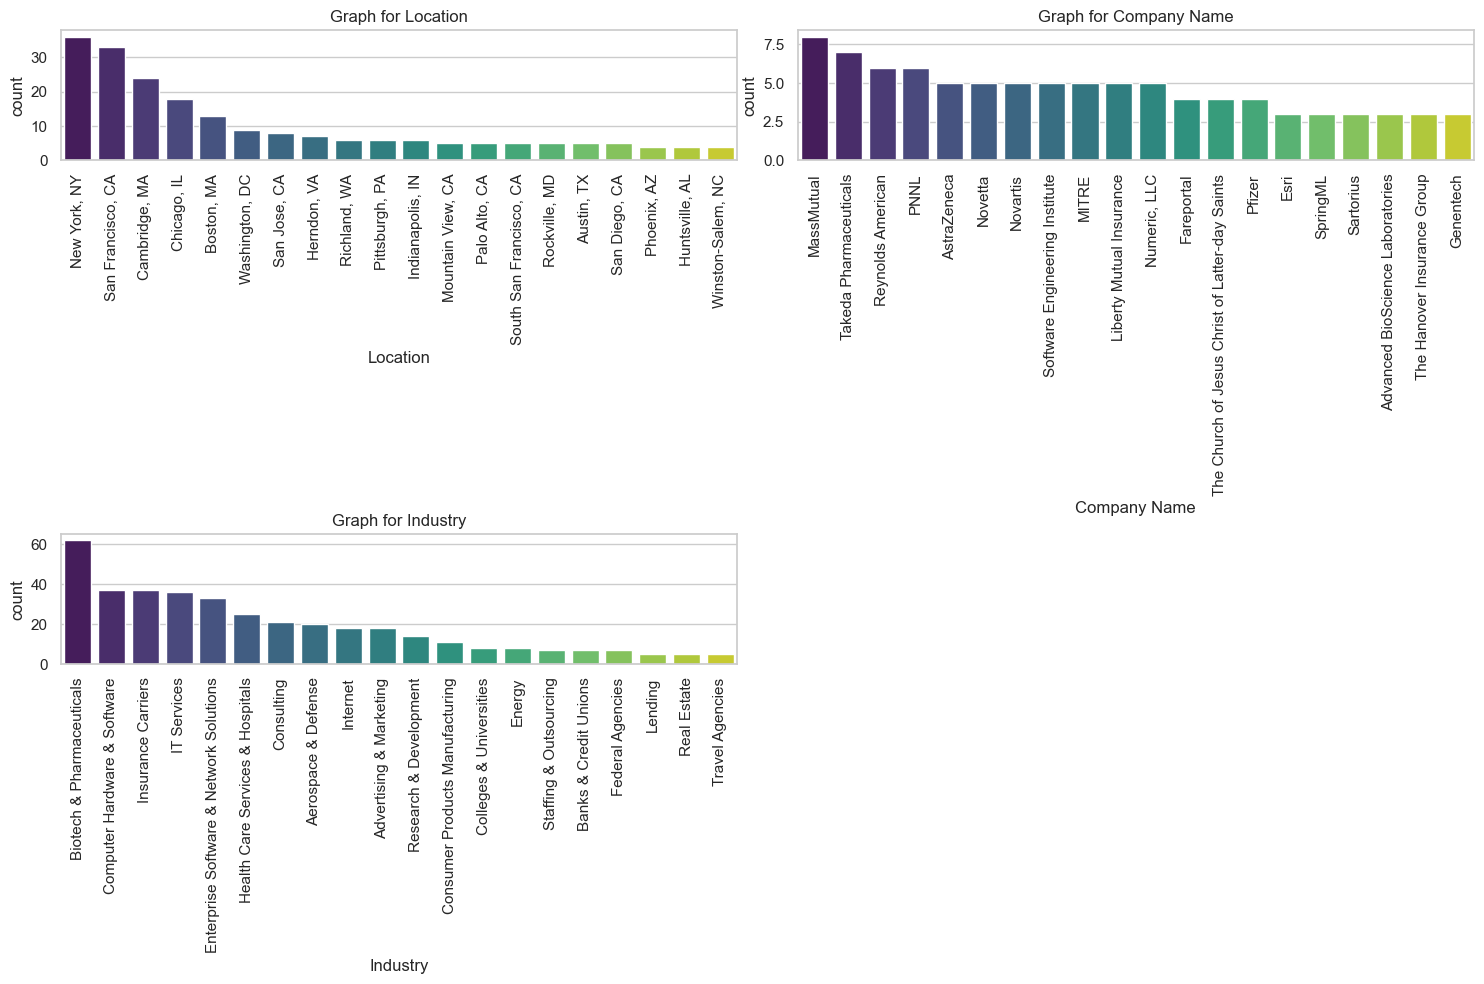

In [174]:
# Selecting categorical columns for visualization
Categorical_columns = df[['Location', 'Company Name', 'Industry']]

df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name']]

# Create subplots (3 columns → at least 2 rows, 2 columns to fit all)
num_plots = len(Categorical_columns.columns)
num_rows = (num_plots + 1) // 2  # Ensures enough rows
num_cols = 2  # Two columns layout

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten axes for easy iteration (handles cases where num_rows = 1)
axes = axes.flatten() if num_rows > 1 else [axes]

# Loop through each selected column
for i, col in enumerate(Categorical_columns.columns):
    # Get value counts for the current column (Top 20)
    cat_num = df_cat[col].value_counts()[:20]
    print(f"Graph for {col}: Total = {len(cat_num)}")

    # Creating a bar plot if there are values
    if not cat_num.empty:
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette='viridis', ax=axes[i])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        axes[i].set_title(f"Graph for {col}")
    else:
        fig.delaxes(axes[min(i, len(axes) - 1)])  # Prevent IndexError

# Remove extra empty subplots
for j in range(len(Categorical_columns.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plots
plt.tight_layout()
plt.show()





In [185]:
df['Job_simplified'] = df['Job Title'].apply(title_simplifier)
df.Job_simplified.value_counts()

NameError: name 'title_simplifier' is not defined

In [179]:
pd.pivot_table(df, index='Job Title', values= 'Salary Estimate')

,Salary Estimate
Job Title,
Ag Data Scientist,80.5
Analytics - Business Assurance Data Analyst,43.0
Analytics Consultant,66.5
Analytics Manager,87.5
Analytics Manager - Data Mart,64.0
...,...
System and Data Analyst,59.0
Systems Engineer II - Data Analyst,62.5
"Technology-Minded, Data Professional Opportunities",70.5


In [195]:
df.groupby('Job Title')['Salary Estimate'].mean()


Job Title
Ag Data Scientist                                      80.5
Analytics - Business Assurance Data Analyst            43.0
Analytics Consultant                                   66.5
Analytics Manager                                      87.5
Analytics Manager - Data Mart                          64.0
                                                      ...  
System and Data Analyst                                59.0
Systems Engineer II - Data Analyst                     62.5
Technology-Minded, Data Professional Opportunities     70.5
VP, Data Science                                      124.5
Web Data Analyst                                      106.0
Name: Salary Estimate, Length: 259, dtype: float64

# Salary By Rating

In [197]:
print(df.columns)


Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'PerHour',
       'Employer', 'State'],
      dtype='object')


In [235]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Employer', 'Type of ownership','Salary Estimate' ]]

In [237]:
# Check data types and convert 'Salary Estimate' column to numeric if necessary
df_pivots['Salary Estimate'] = pd.to_numeric(df_pivots['Salary Estimate'], errors='coerce')

# Drop rows with NaN values in 'Salary Estimate' column
df_pivots.dropna(subset=['Salary Estimate'], inplace=True)

# Create pivot table for each column
for i in df_pivots.columns:
    if i != 'Salary Estimate':  # Exclude 'Salary Estimate' column from pivot table creation
        print(i)
        pivot_table = pd.pivot_table(df_pivots, index=i, values='Salary Estimate', aggfunc='mean')
        pivot_table_sorted = pivot_table.sort_values('Salary Estimate', ascending=False)
        print(pivot_table_sorted.head(2))  # Print only the top 2 rows

Rating
        Salary Estimate
Rating                 
-1.0            225.000
 5.0            129.625
Industry
                                          Salary Estimate
Industry                                                 
Other Retail Stores                                 163.5
Motion Picture Production & Distribution            146.0
Sector
                    Salary Estimate
Sector                             
Media                         117.4
Accounting & Legal            113.5
Revenue
                         Salary Estimate
Revenue                                 
$5 to $10 million (USD)       123.230769
$1 to $5 million (USD)        115.800000
Employer
          Salary Estimate
Employer                 
1              133.800000
0              100.442857
Type of ownership
                                Salary Estimate
Type of ownership                              
Subsidiary or Business Segment           113.92
Company - Public                         110.00


# MACHINE LEARNING MODELS

In [229]:
df_model = df[['Salary Estimate', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'PerHour','Job Title']]
df_model.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Job Title
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,Data Scientist
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,Healthcare Data Scientist
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,Data Scientist
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,Data Scientist
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,Data Scientist


In [241]:
df_dum  = pd.get_dummies(df_model)
pd.set_option('display.max_rows',None)

df_dum.head()

,Salary Estimate,Rating,PerHour,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,...,Job Title_Staff Scientist,Job Title_Staff Scientist- Upstream PD,Job Title_Staff Scientist-Downstream Process Development,Job Title_Supply Chain Data Analyst,Job Title_Survey Data Analyst,Job Title_System and Data Analyst,Job Title_Systems Engineer II - Data Analyst,"Job Title_Technology-Minded, Data Professional Opportunities","Job Title_VP, Data Science",Job Title_Web Data Analyst
0,72.0,3.8,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,87.5,3.4,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,85.0,4.8,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,76.5,3.8,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,114.5,2.9,0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [243]:
df1 = pd.DataFrame(df)

In [245]:
# Function to map values to 1, 0, or keep them unchanged
df_int = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the resulting DataFrame
pd.set_option('display.max_rows',None)
df_int.head()


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,PerHour,Employer,State
0,Data Scientist,72.0,3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,NM
1,Healthcare Data Scientist,87.5,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,MD
2,Data Scientist,85.0,4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,FL
3,Data Scientist,76.5,3.8,PNNL,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,WA
4,Data Scientist,114.5,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,NY


In [247]:

X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [253]:
lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error')

array([-4.47809785e+14, -5.51458990e+14, -3.44653300e+14, -1.90082764e+14,
       -2.69404459e+14])

In [255]:
cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)

array([-2.50200061e+14, -7.38142507e+13, -1.34589474e+14])

In [257]:
np.mean(cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=2))

-236502112959976.5

# Lasso Regression

In [264]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-28.251206601999247

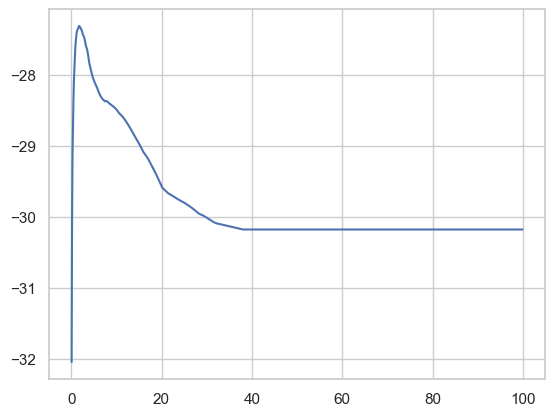

In [266]:
alpha = []
error = []

for i in range(1,1000):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=2)))

plt.plot(alpha,error)

In [268]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns= ['Alpha', 'error'])

# checking how much we improve the model 
df_err[df_err.error==max(df_err.error)]

,Alpha,error
17,1.8,-27.310001


In [270]:
lm_l = Lasso(alpha=1.8)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-29.36472559852501

In [274]:
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-29.36472559852501

# Random Forest

In [281]:
rf = RandomForestRegressor()

In [283]:
np.mean(cross_val_score(rf, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-26.432323670531787

# Hyperparameter Tuning 

In [286]:
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ('friedman_mse', 'absolute_error'),
    'max_features': (None, 'sqrt', 'log2')
}

gs = GridSearchCV(rf, parameters, error_score='raise', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'criterion': ('friedman_mse', 'absolute_error'),
                         'max_features': (None, 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)})

In [288]:
gs.best_score_

0.19388064096371382

In [290]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=70)